In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Datascience/machine learning/Assisted Practice/Lesson 2/SalaryGender.csv')

In [3]:
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [4]:
print(df.shape)


(100, 4)


In [5]:
df.dtypes

Salary    float64
Gender      int64
Age         int64
PhD         int64
dtype: object

In [6]:
df['PhD'].astype('category')

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    1
29    1
     ..
70    0
71    0
72    0
73    1
74    0
75    0
76    1
77    1
78    0
79    1
80    1
81    1
82    0
83    0
84    0
85    0
86    0
87    1
88    0
89    1
90    1
91    0
92    1
93    0
94    1
95    0
96    1
97    0
98    0
99    0
Name: PhD, Length: 100, dtype: category
Categories (2, int64): [0, 1]

In [7]:
df['Gender'].astype('category')

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    0
29    1
     ..
70    0
71    1
72    0
73    1
74    0
75    0
76    1
77    1
78    1
79    1
80    1
81    0
82    1
83    1
84    0
85    0
86    0
87    1
88    1
89    0
90    1
91    0
92    1
93    0
94    0
95    1
96    1
97    1
98    0
99    0
Name: Gender, Length: 100, dtype: category
Categories (2, int64): [0, 1]

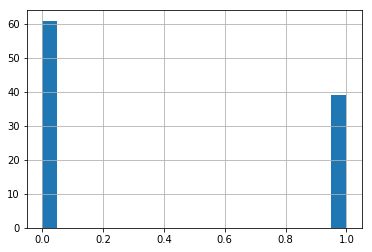

In [8]:
df['PhD'].hist(bins=20)

In [35]:
correlation=df.corr()
print(correlation)

          Salary    Gender       Age       PhD
Salary  1.000000  0.259312  0.477043  0.555560
Gender  0.259312  1.000000  0.160580  0.184521
Age     0.477043  0.160580  1.000000  0.353081
PhD     0.555560  0.184521  0.353081  1.000000


In [36]:
import seaborn as sns

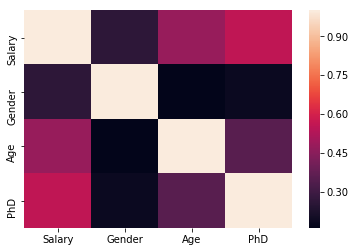

In [37]:
sns.heatmap(correlation)

In [38]:
#Phd is very much influenzed by gender Age as salary

In [40]:
df['Age'].isnull().sum()

0

In [42]:
df['Gender'].isnull().sum()

0

In [43]:
df['Salary'].isnull().sum()

0

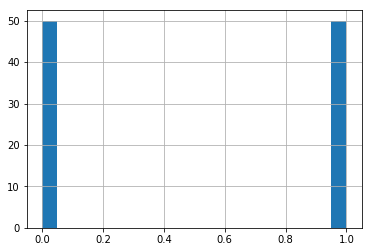

In [9]:
df['Gender'].hist(bins=20)

In [ ]:
#gender is 50:50

Text(0,0.5,'Salary')

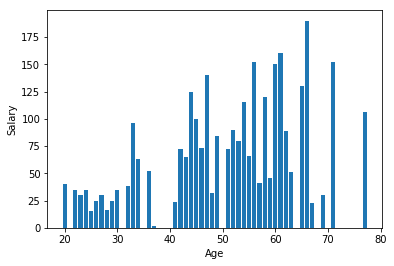

In [53]:
plt.bar(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary and Age Relation')

<Figure size 1440x1440 with 0 Axes>

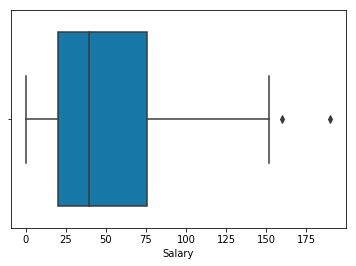

<Figure size 1440x1440 with 0 Axes>

In [51]:
sns.boxplot(x=df['Salary'], palette='winter')
plt.figure(figsize=(20,20))

Text(0.5,1,'Salary distribution by age')

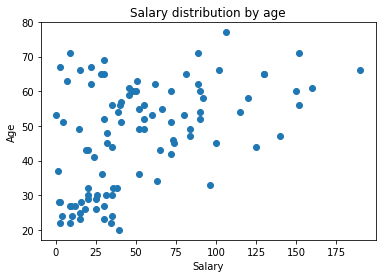

In [10]:
plt.scatter(df['Salary'], df['Age'], alpha=1)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Salary distribution by age')

In [11]:
#lets predict the likely hood of a person holding a PhD

In [12]:
x_feature=df[['Salary','Gender','Age']]
print(x_feature.shape)

(100, 3)


In [13]:
y_target=df['PhD']
print(y_target.shape)

(100,)


In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_feature,y_target, test_size=0.2,random_state=1)

C:\Users\Antony\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 3)
(80,)
(20, 3)
(20,)


In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
result=logreg.fit(x_train,y_train)

In [17]:
print(result)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
y_pred=logreg.predict(x_test)

In [19]:
print (y_pred)

[1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0]


In [26]:
#confusion matris
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[10  3]
 [ 2  5]]


In [28]:
(10+5)/(2+3+5+10) 

0.75

In [ ]:
#75% Accuracy